# **BUSINESS CASE: STATISTICS MODULE PROJECT**

# **MATRICULA: A01706328**
# **NOMBRE: KEVIN JOAN DELGADO PÉREZ**

# *In this project we pretend to be a data scientists and analyze the historical quarters from the finances of all public firms of EE.UU listed in the New York Exchange and NASDAQ.*

# *One of the objetives is to generate a regression linear model to analyze the impact of variables in the changes of the returns of each firm in the next quarter.*

# *To explain the process of analysis, I will describe the plots generated and answering some questions to make the final data frame with the most useful information.*

In [1]:
from google.colab import drive

drive.mount("/content/drive")  
!pwd  # show current path 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [2]:
%cd "/content/drive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases"
!ls  # show current directory

/content/drive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases
us2022q2a.csv  usfirms2022.csv


# Useful libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [4]:
df = pd.read_csv('us2022q2a.csv')

In [5]:
sns.set(rc={"figure.figsize": (14,8)})

# Example of the data frame extracted

In [6]:
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0


# Information of the columns values and other additional information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324447 entries, 0 to 324446
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   firm               324446 non-null  object 
 1   q                  324446 non-null  object 
 2   revenue            158614 non-null  float64
 3   cogs               158309 non-null  float64
 4   sgae               158309 non-null  float64
 5   otheropexp         158311 non-null  float64
 6   extraincome        158613 non-null  float64
 7   finexp             158614 non-null  float64
 8   incometax          158614 non-null  float64
 9   totalassets        159808 non-null  float64
 10  totalliabilities   159808 non-null  float64
 11  shortdebt          129677 non-null  float64
 12  longdebt           159595 non-null  float64
 13  stockholderequity  159740 non-null  float64
 14  adjprice           159154 non-null  float64
 15  originalprice      159234 non-null  float64
 16  sh

Variable calculations:


    - firm size measure: 
          * Book value of the firm = (totalassets-totalalliabilities)
          * Market value = (historical stock price x # of shares) = (original price x sharesoutstanding)

    - Profit margin measures:
          * operating profit margin = operating profit/sales
                -. operating profit = (revenue - cogs - sgae)
                      -- Cost = cost of good sold = variable cost
                      -- sgae = Sales and general administrative expenses = fixed costs
                .- Ebit = earnings before interst and taxes = operating profit
                .- formula: ebit = revenue - cogs - sgae - otheropexp
                    -- otheropexp = other operating expenses
                - profit margin = pm = ebit/revenue

    - profit margin = net income / sales
          * Net income  = ebit - incometax - fine exp + extraincome
          * Income tax = what the firm pays in taxes (for the government (impuesto sobre la renta))
          * finexp = financial expenses = what the firm pays in interest expenses for any lon that the firm issued
          * EPS = Netincome/shareoutstanding
          * ESPS = (Netincome/shareoutstanding)/originalprice


      *** Notes: ALL NUMERIC MONEY VARIABLES ARE IN THOUSAND OF US DOLLARS


#  Converting the data frame to the most recent year of the data set (the last 4 quarters)

In [8]:
df_ly = df.query("q >= '2021q3' and q <='2022q2'")
df_ly

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
86,A,2021q3,1586000.0,734000.0,516000.0000,0.0,12000.000000,21000.000,63000.0,1.049100e+07,5545000.000,130000.000,2728000.000,4946000.000,156.603447,157.53,302722.668,9.0,2021.0,3.0
87,A,2021q4,1660000.0,760000.0,505000.0000,0.0,73000.000000,20000.000,6000.0,1.070500e+07,5316000.000,0.000,2729000.000,5389000.000,158.908608,159.65,302000.797,12.0,2021.0,4.0
88,A,2022q1,1674000.0,764000.0,534000.0000,0.0,-37000.000000,20000.000,36000.0,1.032700e+07,5173000.000,0.000,2730000.000,5154000.000,131.888962,132.33,300113.377,3.0,2022.0,1.0
89,A,2022q2,1607000.0,746000.0,501000.0000,0.0,-7000.000000,20000.000,59000.0,1.045500e+07,5333000.000,175000.000,2730000.000,5122000.000,118.560000,118.77,298708.056,6.0,2022.0,2.0
176,AA,2021q3,3109000.0,2322000.0,217000.0000,33000.0,-15000.000000,58000.000,127000.0,1.419700e+07,8736000.000,1000.000,1724000.000,5461000.000,48.597527,48.94,186866.156,9.0,2021.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324355,ZY,2022q2,2634.0,9732.0,58638.0000,40460.0,-885.000000,9376.000,11.0,4.709680e+05,234345.000,7900.000,178181.000,236623.000,1.230000,1.23,103140.755,6.0,2022.0,2.0
324442,ZYNE,2021q3,0.0,0.0,10210.6520,0.0,-376.636750,-5.038,0.0,8.999617e+04,11309.171,207.635,411.237,78686.999,4.240000,4.24,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,8.117151e+04,10258.173,209.068,353.694,70913.334,2.880000,2.88,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8903.9150,0.0,317.252110,-96.044,0.0,7.438103e+04,9214.059,210.512,295.754,65166.970,2.050000,2.05,42447.037,3.0,2022.0,1.0


# Converting the data frame to the most recent quarter of the dataset (2022q2)

In [128]:
df_lq = df.query("q >= '2022q2' and q <='2022q2'")
df_lq

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
89,A,2022q2,1607000.0,746000.0,5.010000e+05,0.0,-7000.00000,20000.000,59000.0,1.045500e+07,5.333000e+06,175000.000,2.730000e+06,5122000.000,118.560000,118.7700,298708.056,6.0,2022.0,2.0
179,AA,2022q2,3644000.0,2767000.0,2.200000e+05,-75000.0,81000.00000,30000.000,234000.0,1.570900e+07,8.417000e+06,1000.000,1.725000e+06,7292000.000,45.487956,45.5800,184448.686,6.0,2022.0,2.0
269,AAIC,2022q2,10900.0,6374.0,0.000000e+00,0.0,-3417.00000,0.000,802.0,1.084755e+06,8.710570e+05,NaN,2.089690e+05,213698.000,3.250000,3.2500,35016.392,6.0,2022.0,2.0
359,AAL,2022q2,13422000.0,0.0,1.240500e+07,0.0,25000.00000,439000.000,127000.0,6.796300e+07,7.638500e+07,2106000.000,3.496300e+07,-8422000.000,12.680000,12.6800,649514.848,6.0,2022.0,2.0
449,AAME,2022q2,44669.0,0.0,4.678400e+04,0.0,0.00000,0.000,-436.0,3.792740e+05,2.701730e+05,NaN,3.373800e+04,109101.000,2.670000,2.6700,20398.497,6.0,2022.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324085,ZVIA,2022q2,45542.0,28168.0,2.407400e+04,8043.0,3662.00000,0.000,9.0,1.127380e+05,2.553900e+04,685.000,3.680000e+02,87199.000,2.810000,2.8100,67209.461,6.0,2022.0,2.0
324175,ZVO,2022q2,51380.0,34995.0,2.610800e+04,-8882.0,-3824.00000,0.000,8.0,8.543300e+04,7.882800e+04,0.000,0.000000e+00,6605.000,0.970100,0.9701,34095.968,6.0,2022.0,2.0
324265,ZWS,2022q2,284200.0,170400.0,6.000000e+04,300.0,-600.00000,5200.000,11300.0,1.176300e+06,9.469000e+05,5600.000,5.378000e+05,229400.000,27.179735,27.2400,125967.533,6.0,2022.0,2.0
324355,ZY,2022q2,2634.0,9732.0,5.863800e+04,40460.0,-885.00000,9376.000,11.0,4.709680e+05,2.343450e+05,7900.000,1.781810e+05,236623.000,1.230000,1.2300,103140.755,6.0,2022.0,2.0


In [130]:
df_lqq = df_lq[['q','firm']]
df_lqq

,q,firm
89,2022q2,A
179,2022q2,AA
269,2022q2,AAIC
359,2022q2,AAL
449,2022q2,AAME
...,...,...
324085,2022q2,ZVIA
324175,2022q2,ZVO
324265,2022q2,ZWS
324355,2022q2,ZY


# **NOTE: FOR THE DESCRIPTIVE STATISTICS ANDO MOST OF THE CALCULATIONS I WILL USE THE ANALYSIS OF THE ROLLING YEAR**

# DOING THE ANALYSIS OF THE LAST YEAR AND USING DATA MANAGEMENT TO ADAPT THE DATA

**First, separate the colums to use only the last amount because they are acumulatives values**

In [10]:
df_lytosum = df_ly[['firm','revenue','cogs','sgae','otheropexp','finexp','incometax']]
df_lytosum

,firm,revenue,cogs,sgae,otheropexp,finexp,incometax
86,A,1586000.0,734000.0,516000.0000,0.0,21000.000,63000.0
87,A,1660000.0,760000.0,505000.0000,0.0,20000.000,6000.0
88,A,1674000.0,764000.0,534000.0000,0.0,20000.000,36000.0
89,A,1607000.0,746000.0,501000.0000,0.0,20000.000,59000.0
176,AA,3109000.0,2322000.0,217000.0000,33000.0,58000.000,127000.0
...,...,...,...,...,...,...,...
324355,ZY,2634.0,9732.0,58638.0000,40460.0,9376.000,11.0
324442,ZYNE,0.0,0.0,10210.6520,0.0,-5.038,0.0
324443,ZYNE,0.0,0.0,8836.4365,0.0,-4.433,0.0
324444,ZYNE,0.0,0.0,8903.9150,0.0,-96.044,0.0


**Then, I grouped the dataframe by the same firm, adding the amounts obtained according to the quarters**

In [11]:
df_lytosum = df_lytosum.groupby('firm').sum()
df_lytosum

,revenue,cogs,sgae,otheropexp,finexp,incometax
firm,,,,,,
A,6527000.0,3004000.0,2.056000e+06,0.0,81000.000,164000.0
AA,13386000.0,9653000.0,8.930000e+05,1138000.0,141000.000,869000.0
AAIC,31855.0,15523.0,0.000000e+00,0.0,0.000,4333.0
AAL,40717000.0,0.0,4.160800e+07,0.0,1828000.000,-546000.0
AAME,195299.0,0.0,1.915230e+05,0.0,0.000,863.0
...,...,...,...,...,...,...
ZVIA,156702.0,93921.0,8.744600e+04,94595.0,0.000,55.0
ZVO,230001.0,149303.0,1.118000e+05,5753.0,0.000,98.0
ZWS,340300.0,195100.0,1.196000e+05,3400.0,22000.000,-13700.0


**Later, I separated the another part of the data frame by the columns about the total information**

In [12]:
df_lylastq = df_lq[['firm','totalassets','totalliabilities','shortdebt','longdebt','stockholderequity','adjprice','originalprice','sharesoutstanding']]
df_lylastq

,firm,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding
89,A,1.045500e+07,5.333000e+06,175000.000,2.730000e+06,5122000.000,118.560000,118.7700,298708.056
179,AA,1.570900e+07,8.417000e+06,1000.000,1.725000e+06,7292000.000,45.487956,45.5800,184448.686
269,AAIC,1.084755e+06,8.710570e+05,NaN,2.089690e+05,213698.000,3.250000,3.2500,35016.392
359,AAL,6.796300e+07,7.638500e+07,2106000.000,3.496300e+07,-8422000.000,12.680000,12.6800,649514.848
449,AAME,3.792740e+05,2.701730e+05,NaN,3.373800e+04,109101.000,2.670000,2.6700,20398.497
...,...,...,...,...,...,...,...,...,...
324085,ZVIA,1.127380e+05,2.553900e+04,685.000,3.680000e+02,87199.000,2.810000,2.8100,67209.461
324175,ZVO,8.543300e+04,7.882800e+04,0.000,0.000000e+00,6605.000,0.970100,0.9701,34095.968
324265,ZWS,1.176300e+06,9.469000e+05,5600.000,5.378000e+05,229400.000,27.179735,27.2400,125967.533
324355,ZY,4.709680e+05,2.343450e+05,7900.000,1.781810e+05,236623.000,1.230000,1.2300,103140.755


**Finally, I merge both tables and obtained the Rolling year dataframe for the analysis.**

In [150]:
df_rolly = df_lytosum.merge(df_lylastq, on='firm')
df_rolly = df_rolly.merge(df_lqq, on='firm')
df_rolly

,firm,revenue,cogs,sgae,otheropexp,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,q
0,A,6527000.0,3004000.0,2.056000e+06,0.0,81000.000,164000.0,1.045500e+07,5.333000e+06,175000.000,2.730000e+06,5122000.000,118.560000,118.7700,298708.056,2022q2
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,141000.000,869000.0,1.570900e+07,8.417000e+06,1000.000,1.725000e+06,7292000.000,45.487956,45.5800,184448.686,2022q2
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,0.000,4333.0,1.084755e+06,8.710570e+05,NaN,2.089690e+05,213698.000,3.250000,3.2500,35016.392,2022q2
3,AAL,40717000.0,0.0,4.160800e+07,0.0,1828000.000,-546000.0,6.796300e+07,7.638500e+07,2106000.000,3.496300e+07,-8422000.000,12.680000,12.6800,649514.848,2022q2
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000,863.0,3.792740e+05,2.701730e+05,NaN,3.373800e+04,109101.000,2.670000,2.6700,20398.497,2022q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,0.000,55.0,1.127380e+05,2.553900e+04,685.000,3.680000e+02,87199.000,2.810000,2.8100,67209.461,2022q2
3603,ZVO,230001.0,149303.0,1.118000e+05,5753.0,0.000,98.0,8.543300e+04,7.882800e+04,0.000,0.000000e+00,6605.000,0.970100,0.9701,34095.968,2022q2
3604,ZWS,340300.0,195100.0,1.196000e+05,3400.0,22000.000,-13700.0,1.176300e+06,9.469000e+05,5600.000,5.378000e+05,229400.000,27.179735,27.2400,125967.533,2022q2
3605,ZY,14546.0,48949.0,2.327660e+05,69138.0,26572.000,44.0,4.709680e+05,2.343450e+05,7900.000,1.781810e+05,236623.000,1.230000,1.2300,103140.755,2022q2


# Merging Rolling Year Table

**Another step is merge the rolling year table with the dataset of the firms and some extra details of information.**

In [151]:
df_firms = pd.read_csv('usfirms2022.csv')

In [152]:
df_firms.rename(columns = {'Ticker':'firm','Sector NAICS\nlevel 1':'Industry'},inplace=True)

In [153]:
df_rolly = df_rolly.merge(df_firms, on='firm')
df_rolly['q']

0       2022q2
1       2022q2
2       2022q2
3       2022q2
4       2022q2
         ...  
3595    2022q2
3596    2022q2
3597    2022q2
3598    2022q2
3599    2022q2
Name: q, Length: 3600, dtype: object

**Finally, I get the table with both dataframes, so the definitive data is ready to doing the analysis.**

In [154]:
## take the date from string type to date type

df_rolly['q'] = pd.PeriodIndex(df_rolly['q'], freq="Q")
df_rolly.set_index(['firm','q'],inplace=True)
df_rolly.drop(columns=["Name","N","Class","Country\nof Origin",
                        "Type of Asset","Exchange / Src","Sector NAICS\nlast available","partind"], inplace=True)
df_rolly

,,revenue,cogs,sgae,otheropexp,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,Industry,Sector\nEconomatica
firm,q,,,,,,,,,,,,,,,,
A,2022Q2,6527000.0,3004000.0,2.056000e+06,0.0,81000.000,164000.0,1.045500e+07,5.333000e+06,175000.000,2.730000e+06,5122000.000,118.560000,118.7700,298708.056,Manufacturing,Electric Electron
AA,2022Q2,13386000.0,9653000.0,8.930000e+05,1138000.0,141000.000,869000.0,1.570900e+07,8.417000e+06,1000.000,1.725000e+06,7292000.000,45.487956,45.5800,184448.686,Manufacturing,Basic & Fab Metal
AAIC,2022Q2,31855.0,15523.0,0.000000e+00,0.0,0.000,4333.0,1.084755e+06,8.710570e+05,NaN,2.089690e+05,213698.000,3.250000,3.2500,35016.392,Finance and Insurance,Funds
AAL,2022Q2,40717000.0,0.0,4.160800e+07,0.0,1828000.000,-546000.0,6.796300e+07,7.638500e+07,2106000.000,3.496300e+07,-8422000.000,12.680000,12.6800,649514.848,Transportation and Warehousing,Transportat Serv
AAME,2022Q2,195299.0,0.0,1.915230e+05,0.0,0.000,863.0,3.792740e+05,2.701730e+05,NaN,3.373800e+04,109101.000,2.670000,2.6700,20398.497,Finance and Insurance,Finance and Insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,2022Q2,156702.0,93921.0,8.744600e+04,94595.0,0.000,55.0,1.127380e+05,2.553900e+04,685.000,3.680000e+02,87199.000,2.810000,2.8100,67209.461,Manufacturing,Food & Beverage
ZVO,2022Q2,230001.0,149303.0,1.118000e+05,5753.0,0.000,98.0,8.543300e+04,7.882800e+04,0.000,0.000000e+00,6605.000,0.970100,0.9701,34095.968,Educational Services,Other
ZWS,2022Q2,340300.0,195100.0,1.196000e+05,3400.0,22000.000,-13700.0,1.176300e+06,9.469000e+05,5600.000,5.378000e+05,229400.000,27.179735,27.2400,125967.533,Manufacturing,Industrial Machin


# 1. Show how many firms by industry there are in the sample

In [157]:
df_rolly['Industry'].shape

(3600,)

- ANSWER:

    THERE IS 3600 DIFERENT FIRMS IN THE DATAFRAME.

In [158]:
df_rolly['Industry'].value_counts(sort = True)

Manufacturing                                                               1565
Finance and Insurance                                                        701
Information                                                                  261
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                103
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

## 2. For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?`

In [159]:
df_rollyInd_statistics = df_rolly.groupby('Industry').describe()
df_rollyInd_statistics

revenue                \
                                                     count          mean   
Industry                                                                   
-                                                      2.0  5.441300e+05   
Accommodation and Food Services                       69.0  3.334190e+06   
Administrative and Support and Waste Management...   133.0  3.490923e+06   
Agriculture, Forestry, Fishing and Hunting            16.0  4.743554e+06   
Arts, Entertainment, and Recreation                   21.0  5.743397e+06   
Construction                                          45.0  5.590052e+06   
Educational Services                                  14.0  9.692615e+05   
Finance and Insurance                                701.0  3.602098e+06   
Health Care and Social Assistance                     64.0  3.222080e+06   
Information                                          261.0  4.890341e+06   
Manufacturing                                       1565.0  4.279490e+06   
Mining, Quarrying, and Oil and Gas Extraction        103.0  3.651868e+06   
Other Services (except Public Administration)         16.0  1.217705e+06   
Professional, Scientific, and Technical Services     145.0  4.518472e+06   
Real Estate and Rental and Leasing                    68.0  2.889116e+06   
Retail Trade                                         152.0  2.051981e+07   
Transportation and Warehousing                        69.0  9.567189e+06   
Utilities                                             77.0  6.011221e+06   
Wholesale Trade                                       79.0  1.654606e+07   

                                                                  \
                                                             std   
Industry                                                           
-                                                   7.695160e+05   
Accommodation and Food Services                     5.687877e+06   
Administrative and Support and Waste Management...  5.560862e+06   
Agriculture, Forestry, Fishing and Hunting          6.426447e+06   
Arts, Entertainment, and Recreation                 1.748082e+07   
Construction                                        6.929885e+06   
Educational Services                                8.582991e+05   
Finance and Insurance                               1.717976e+07   
Health Care and Social Assistance                   8.268393e+06   
Information                                         2.003246e+07   
Manufacturing                                       1.915151e+07   
Mining, Quarrying, and Oil and Gas Extraction       6.512510e+06   
Other Services (except Public Administration)       1.200365e+06   
Professional, Scientific, and Technical Services    2.510994e+07   
Real Estate and Rental and Leasing                  6.274529e+06   
Retail Trade                                        6.882593e+07   
Transportation and Warehousing                      1.842232e+07   
Utilities                                           7.302116e+06   
Wholesale Trade                                     4.479290e+07   

                                                                   \
                                                              min   
Industry                                                            
-                                                        0.000000   
Accommodation and Food Services                       9726.391200   
Administrative and Support and Waste Management...    1446.748017   
Agriculture, Forestry, Fishing and Hunting           11625.000000   
Arts, Entertainment, and Recreation                   4411.821010   
Construction                                         16369.000000   
Educational Services                                215230.000000   
Finance and Insurance                              -769957.000000   
Health Care and Social Assistance                     -718.000000   
Information                                          

In [160]:
df_rollyInd = df_rolly.groupby('Industry').sum()
df_rollyInd

,revenue,cogs,sgae,otheropexp,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding
Industry,,,,,,,,,,,,,,
-,1.088260e+06,0.000000e+00,5.673480e+05,0.000000e+00,0.000000e+00,5.079000e+03,1.308838e+07,7.383937e+06,0.000000e+00,0.000000e+00,5.704446e+06,26.575787,26.760000,3.945809e+05
Accommodation and Food Services,2.300591e+08,9.033423e+07,8.342076e+07,1.974744e+07,1.011783e+07,6.306329e+06,4.111708e+08,3.762241e+08,8.998484e+06,2.715845e+08,3.494665e+07,4068.062060,4072.685000,8.353887e+06
Administrative and Support and Waste Management and Remediation Services,4.642928e+08,2.092795e+08,1.745880e+08,3.609832e+06,8.562402e+06,1.222429e+07,1.009584e+09,6.599692e+08,3.242024e+07,2.938432e+08,3.496152e+08,9083.599074,9090.750900,2.156734e+07
"Agriculture, Forestry, Fishing and Hunting",7.589687e+07,5.356805e+07,1.353913e+07,7.366250e+05,1.140147e+06,1.773405e+06,1.214544e+08,6.701098e+07,5.272155e+06,2.714100e+07,5.444340e+07,621.026424,622.630000,2.248198e+06
"Arts, Entertainment, and Recreation",1.206113e+08,2.011084e+07,9.046662e+07,6.695415e+05,3.026760e+06,2.015667e+06,2.730651e+08,1.705713e+08,7.195627e+06,8.592102e+07,1.024938e+08,1135.809999,1135.809999,4.946313e+06
Construction,2.515523e+08,1.967606e+08,1.978986e+07,1.600736e+06,2.114898e+06,7.435379e+06,2.273050e+08,1.157421e+08,9.070583e+06,4.846491e+07,1.115629e+08,6054.821725,6056.965000,3.054278e+06
Educational Services,1.356966e+07,6.596984e+06,6.029620e+06,1.173710e+05,1.912080e+05,2.804050e+05,2.301000e+07,1.050552e+07,4.593500e+05,5.563598e+06,1.250447e+07,890.390354,891.960300,8.280204e+05
Finance and Insurance,2.525071e+09,8.356033e+08,9.582542e+08,3.491704e+07,2.029981e+07,1.000409e+08,3.176247e+10,2.812745e+10,1.264218e+08,3.451378e+09,3.635014e+09,37483.816221,37611.793600,1.049923e+08
Health Care and Social Assistance,2.062131e+08,5.914381e+07,1.240082e+08,1.366730e+07,5.415769e+06,4.880665e+06,2.552427e+08,1.915141e+08,3.976273e+06,1.347814e+08,6.372857e+07,2681.118719,2683.972100,5.930195e+06


**INFORMATION OF EACH TYPE OF INDUSTRY ACCORDING THE AREA OR ACTIVITY OF THE INDUSTRY**

In [161]:
df_bv = df_rollyInd.assign(bookvalue = (df_rollyInd['totalassets']-df_rollyInd['totalliabilities']))
df_bvSorted = df_bv.sort_values(by=['bookvalue'], ascending = False )
df_bvSorted['bookvalue']

Industry
Finance and Insurance                                                       3.635015e+09
Manufacturing                                                               3.449484e+09
Information                                                                 1.036435e+09
Utilities                                                                   5.432704e+08
Professional, Scientific, and Technical Services                            5.028128e+08
Retail Trade                                                                5.002175e+08
Administrative and Support and Waste Management and Remediation Services    3.496151e+08
Mining, Quarrying, and Oil and Gas Extraction                               3.245564e+08
Transportation and Warehousing                                              2.334237e+08
Real Estate and Rental and Leasing                                          1.180439e+08
Wholesale Trade                                                             1.147446e+08
Construction

**BOOKVALUE OF EACH TYPE OF INDUSTRY ACCODING TO THE AREA OF ACTIVITY, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST BOOK VALUE**

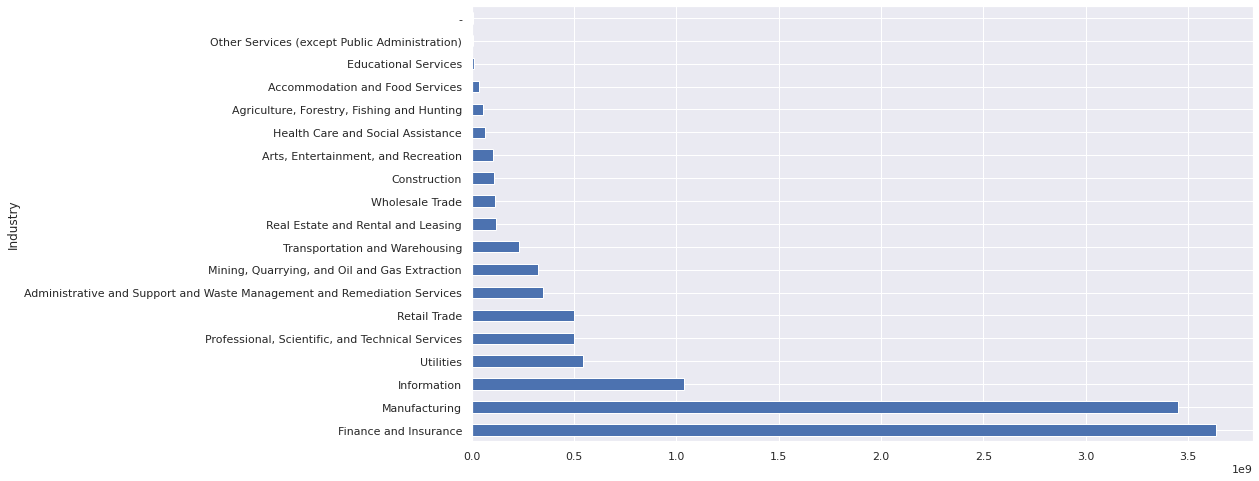

In [162]:
df_bvSorted['bookvalue'].plot(kind = 'barh')

**PLOT OF EACH TYPE OF INDUSTRY ACCORDING THE BOOK VALUE IN THE ACTIVITY AREA THAT THE INDUSTRY DOES**

**Axis X = THOUSAND OF DOLARS**

**Axis Y = TYPE OF INDUSTRY**

***ANALYSIS:***

*ACCORDING THE PLOT ABOVE, WE CAN SEE THAT MOST OF THE DISTRIBUTION IN BOOK VALUE OF ALL THE FIRMS ARE IN THE FINANCE AND MANUFACTURING AREA, THIS COULD MEAN THAT GENERALLY THIS AREAS MANAGE GREATEST QUANTITIES TO WORK THAN THE ANOTHER AREAS.*

In [163]:
df_mv = df_rollyInd.assign(marketvalue = (df_rollyInd['originalprice']*df_rollyInd['sharesoutstanding']))
df_mvSorted = df_mv.sort_values(by=['marketvalue'], ascending = False )
df_mvSorted['marketvalue']

Industry
Manufacturing                                                               1.438814e+13
Finance and Insurance                                                       3.948950e+12
Information                                                                 1.073203e+12
Retail Trade                                                                3.717480e+11
Administrative and Support and Waste Management and Remediation Services    1.960633e+11
Professional, Scientific, and Technical Services                            1.643399e+11
Utilities                                                                   9.605831e+10
Mining, Quarrying, and Oil and Gas Extraction                               6.604297e+10
Transportation and Warehousing                                              5.661430e+10
Wholesale Trade                                                             5.617967e+10
Accommodation and Food Services                                             3.402275e+10
Construction

**MARKET VALUE OF EACH TYPE OF INDUSTRY ACCODING TO THE AREA OF ACTIVITY, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST MARKET VALUE**

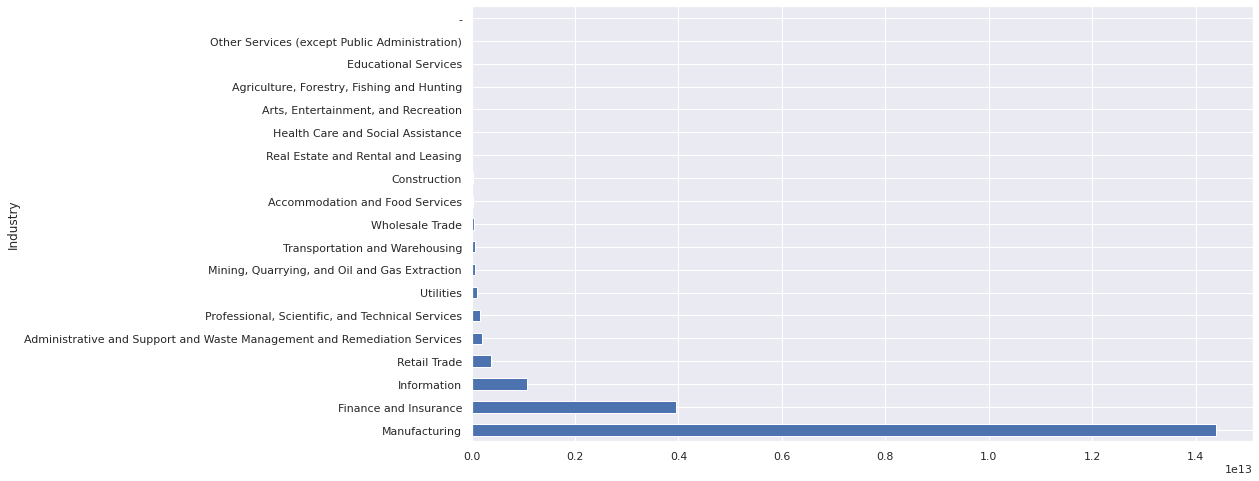

In [164]:
df_mvSorted['marketvalue'].plot(kind = 'barh')

**Axis X = THOUSAND OF DOLARS**

**Axis Y = TYPE OF INDUSTRY**

***ANALYSIS:***

*ACCORDING THE PLOT ABOVE, WE CAN SEE THAT MOST OF THE DISTRIBUTION IN MARKET VALUE OF ALL THE FIRMS ARE IN THE FINANCE AND MANUFACTURING AREA, THIS COULD MEAN THAT THIS AREAS ARE TAKING AN IMPORTANT RELEVANCE IN THE MARKET, SPECIFICALLY THE AREA WITH MOST PROJECTION OR POSSIBILITY OF GROWTH ARE THE MANUFACTURING AREA BUT THE MARKET VALUE CAN ALSO INDICATE THE MOST QUOTED AND EXPENSIVE THAT IT CAN BE TO ACQUIRE ANY FIRM OF THIS AREA.*

In [165]:
df_bv['bookvalue'].describe()

count    1.900000e+01
mean     5.895441e+08
std      1.072939e+09
min      5.704446e+06
25%      5.908599e+07
50%      1.180439e+08
75%      5.015152e+08
max      3.635015e+09
Name: bookvalue, dtype: float64

In [166]:
df_mv['marketvalue'].describe()

count    1.900000e+01
mean     1.079552e+12
std      3.348690e+12
min      1.055899e+07
25%      1.076727e+10
50%      5.617967e+10
75%      1.802016e+11
max      1.438814e+13
Name: marketvalue, dtype: float64

In [167]:
print("THE MEDIAN OF THE BOOK VALUES OF ALL FIRMS IS: ",df_bvSorted['bookvalue'].median())

THE MEDIAN OF THE BOOK VALUES OF ALL FIRMS IS:  118043861.27699998


In [168]:
print("THE MEDIAN OF THE MARKET VALUES OF ALL FIRMS IS: ",df_mvSorted['marketvalue'].median())

THE MEDIAN OF THE MARKET VALUES OF ALL FIRMS IS:  56179673000.43976


**ANALYSIS OF MEDIANS:**

*THE MEDIAN OF THE MARKET VALUE IS HIGHER THAN THE MEDIAN OF THE BOOK VALUE, THIS MEANS THAT, IN THE CURRENT MARKET OF FIRMS, THE VALUE OF MOST OF THE FIRMS HAVE AN INFLATED PRICE, BUT THE TYPICAL FIRM SIZE IS IMPORTANT TOO, BECAUSE THE DIFERENCE OF ALL THE MARKET VALUE FIRMS AND THE BOOK VALUE FIRMS COMPARATED WITH THE TOP TYPE OF INDUSTRY IS TOO MUCH HIGHER. THIS MEAN ABOUT THE POPULARITY AND THE PROJECTION ABOUT MANUFACTURING INDUSTRY.*

***GENERAL ANALYSIS:***

*COMPARING BOTH PLOTS AND ANALYSIS ABOUT MARKET VALUE AND BOOK VALUE, IT CAN SAY THAT IN TERMS OF MARKET VALUE, ARE MOST DIFFERENCES BETWEEN EACH ONE, A FACTOR ABOUT THIS CAN BE THE POPULARITY OF JUST A FEW OF THEM BECAUSE THE PROFITABILITY, THE DEVASTATING DIFFERENCE CAN BE SEEN IN THAT ONLY 2 FIRMS EXCEED THE MEDIAN MARKET VALUE.*

*IN TERMS OF BOOK VALUE, THE ARGUMENT IS THE SAME BUT THE DIFFERENCES ARE OF SMALLER DISTANCE, PROBABLY SOME FIRMS OF ANOTHER AREAS HAD MORE BOOK VALUE IN THE START OF THE ROLLING YEAR BECAUSE THEIR YEARS OF OPERATION IN THE MARKET OF EE.UU.*

# For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [169]:
df_pm = df_rollyInd

#NOTE:

**Using pd.replace to change the zero values to NaN**

In [170]:
df_pm.replace([0], np.nan, inplace=True)

In [171]:
df_pm = df_pm.assign(operatingprofit = (df_pm['revenue']-df_pm['cogs']-df_pm['sgae']-df_pm['otheropexp']))
df_pmTop = df_pm.sort_values(by='operatingprofit', ascending = False)
df_pmTop['operatingprofit']

Industry
Manufacturing                                                               9.637272e+08
Finance and Insurance                                                       6.962962e+08
Information                                                                 2.258868e+08
Retail Trade                                                                1.744776e+08
Professional, Scientific, and Technical Services                            1.371890e+08
Mining, Quarrying, and Oil and Gas Extraction                               1.112517e+08
Administrative and Support and Waste Management and Remediation Services    7.681538e+07
Utilities                                                                   6.477553e+07
Transportation and Warehousing                                              5.845164e+07
Accommodation and Food Services                                             3.655665e+07
Wholesale Trade                                                             3.455700e+07
Construction

**OPERATING PROFIT OF EACH TYPE OF THE INDUSTRY ACCODING TO THE AREA OF ACTIVITY, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST OPERATING PROFIT**

In [172]:
df_pm = df_pm.assign(profitmargin = (df_pm['operatingprofit']/df_pm['revenue']))
df_pmTop = df_pm.sort_values(by='profitmargin', ascending = False)
ind = df_pmTop['profitmargin'].index
df_pmTop = df_pmTop.drop(ind[0])
df_pmTop[['operatingprofit','revenue','profitmargin']]

,operatingprofit,revenue,profitmargin
Industry,,,
Finance and Insurance,6.962962e+08,2.525071e+09,0.275753
"Professional, Scientific, and Technical Services",1.371890e+08,6.551785e+08,0.209392
Information,2.258868e+08,1.276379e+09,0.176975
Administrative and Support and Waste Management and Remediation Services,7.681538e+07,4.642928e+08,0.165446
Accommodation and Food Services,3.655665e+07,2.300591e+08,0.158901
Manufacturing,9.637272e+08,6.697402e+09,0.143896
Utilities,6.477553e+07,4.628640e+08,0.139945
Real Estate and Rental and Leasing,2.748559e+07,1.964599e+08,0.139904
Construction,3.340110e+07,2.515523e+08,0.132780


**OPERATING PROFIT, REVENUES AND PROFIT MARGIN OF EACH TYPE OF INDUSTRY ACCODING TO THE AREA OF ACTIVITY, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST PROFIT MARGIN VALUE**

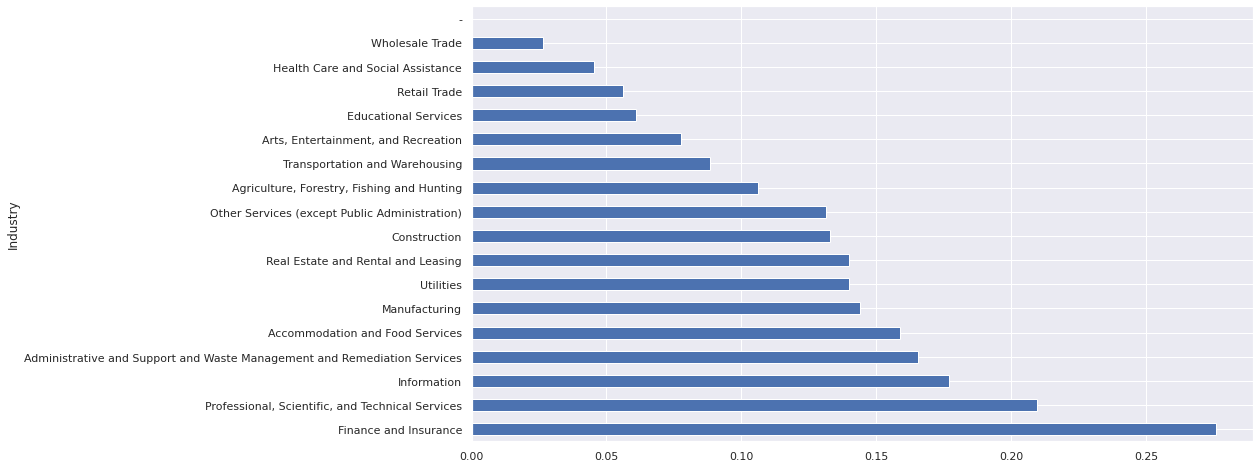

In [173]:
df_pmTop['profitmargin'].plot(kind = 'barh')

***ANALYSIS:***

*ACCORDING THE PLOT ABOVE, WE CAN SEE THAT THE PROFIT MARGIN VALUE IS CLOSE BETWEEN EACH ONE, BUT MINING INDUSTRY STAND OUT AT THE TOP OF INDUSTRY AREAS, SOMETHING THAT NOT HAPPEN IN THE PREVIOUS PLOTS, THIS MAY BE DUE TO THE PRICES THAT ARE MANAGED IN THE INDUSTRY.*

*ANOTHER CASE IS ABOUT FINANCE AND INSURANCE INDUSTRY THAT ARE IN THE TOP IN MAJOR OF THE PLOTS, THIS MEANS THE GOOD PERFORMANCE THAT CAN BE THE INDUSTRY IN THE PROFITABILITY OF THE SERVICES THAT OFFERS.*

*THE LAST CASE IS ABOUT MANUFACTURING INDUSTRY THAT DESPITE BEING IN THE TOP OF THE BOOK AND MARKET VALUES, THE PROFIT MARGIN IS NOT THE BEST, THIS MEANS THAT MOST OF THE MANUFACTURING PRODUCTS, THEY PREFER THE AMOUNT THEY SELL AND THE LITTLE PROFIT THEY GET FROM A HIGHER AMOUNT OF SALES.*

In [174]:
df_pmTop['profitmargin'].describe()

count    17.000000
mean      0.125606
std       0.063772
min       0.026437
25%       0.077641
50%       0.132780
75%       0.158901
max       0.275753
Name: profitmargin, dtype: float64

***GENERAL ANALYSIS:***

*IN RESUME, THE MOST PROFITABILITY FIRMS ARE THE MINING INDUSTRIES DUE THE PROFIT MARGIN, BUT THAT MEANS ABOUT THE ELEVATE COSTS THAT THE PRODUCTS HAVE AND THE BASE OF ALL THE ANOTHER PRODUCTS INDUSTRIES(IN THE CASE OF OIL AND GAS), BUT ANOTHER INSTEREST CASE IS ABOUT THE SERVICES INDUSTRIES, THAT SOME HAVE A HIGHER PROFIT MARGIN THAN THE AVERAGE(0.153).*

*IN THIS CASES, THE INDUSTRY WITH MINOR CHANGES ACROSS THE PLOTS IN THE LIST OF INDUSTRIES WAS FINANCE AND INSURANCE, IT MEANS THAT THE MARKET OF THE INDUSTRY IS BALANCED IN TERMS OF SALES, REVENUES AND EXPENSES*

# Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [175]:
df_rollymv = df_rolly.assign(marketvalue = (df_rolly['originalprice']*df_rolly['sharesoutstanding']))

In [176]:
df_rollmvTop = df_rollymv[['firm','marketvalue']].sort_values(by='marketvalue', ascending = False).head(10)
df_rollmvTop

KeyError: ignored

**TOP 10 FIRMS WITH THE HIGHER MARKET VALUE, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST MARKET VALUE**

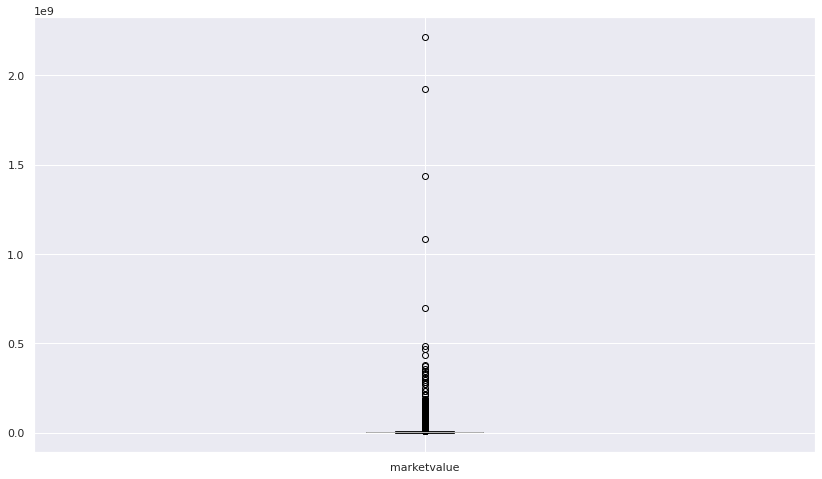

In [177]:
df_rollymv[['marketvalue']].boxplot()

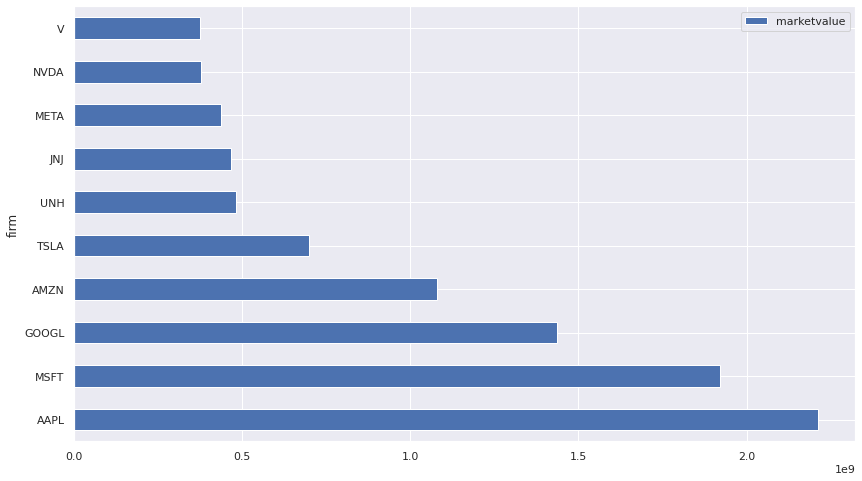

In [178]:
df_rollmvTop.plot(kind = 'barh', x = 'firm')

**TOP 10 FIRMS WITH THE HIGHER MARKET VALUE, THE INFORMATION GOES FROM THE FEWEST TO THE GREATEST MARKET VALUE**

In [179]:
df_rollymv[['marketvalue']].describe()

,marketvalue
count,3.548000e+03
mean,1.095980e+07
std,6.632062e+07
min,3.490000e+01
25%,1.907523e+05
50%,1.105076e+06
75%,4.607257e+06
max,2.212838e+09


***GENERAL ANALYSIS:***

*THE TOP 10 FIRMS ARE SO FAR IN TERMS OF MARKET VALUE OF THE ANOTHER FIRMS AND ACCORDING TO THE AVERAGE MARKET VALUE OF ALL THE FIRMS*



# Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [180]:
df_rollybv = df_rolly.assign(bookvalue = (df_rolly['totalassets']-df_rolly['totalliabilities']))

In [181]:
df_rollybvTop = df_rollybv[['firm','bookvalue']].sort_values(by='bookvalue', ascending = False).head(10)
df_rollybvTop

KeyError: ignored

**TOP 10 FIRMS WITH THE HIGHER BOOK VALUE, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST BOOK VALUE**

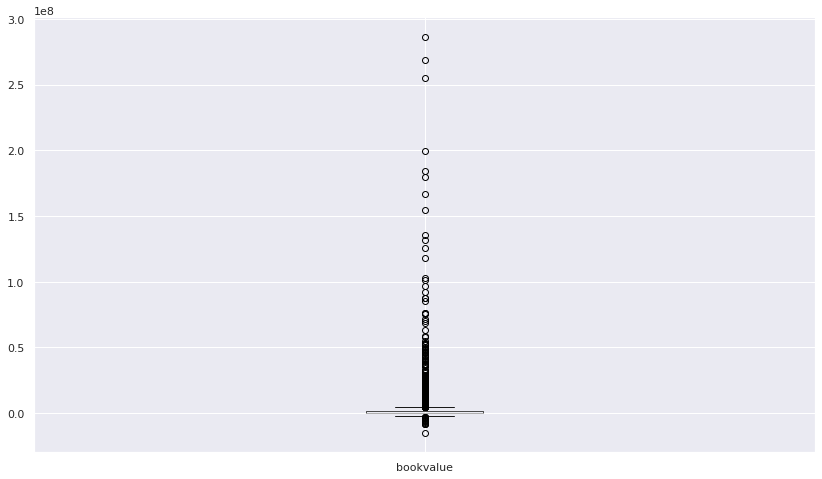

In [182]:
df_rollybv[['bookvalue']].boxplot()

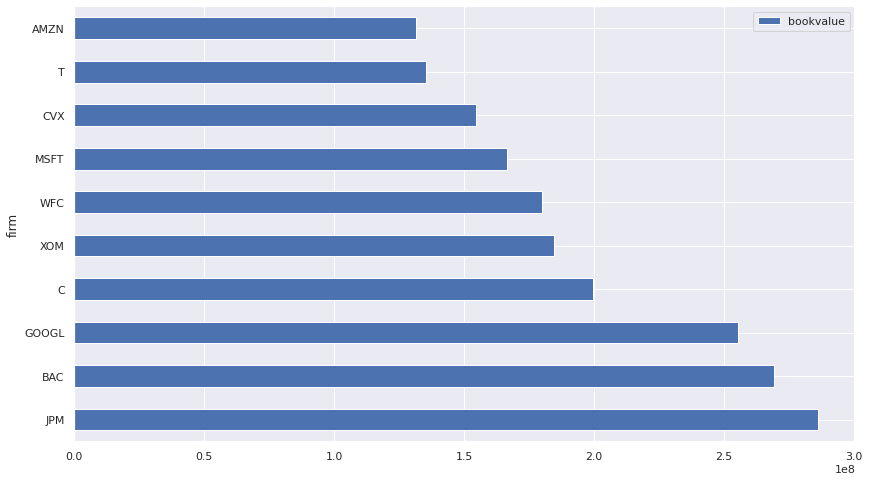

In [183]:
df_rollybvTop.plot(kind = 'barh', x = 'firm')

**TOP 10 FIRMS WITH THE HIGHER BOOK VALUE, THE INFORMATION GOES FROM THE FEWEST TO THE GREATEST BOOK VALUE**

In [184]:
df_rollybv[['bookvalue']].describe()

,bookvalue
count,3.362000e+03
mean,3.331749e+06
std,1.386098e+07
min,-1.479100e+07
25%,1.060878e+05
50%,4.577370e+05
75%,1.792766e+06
max,2.861430e+08


***GENERAL ANALYSIS:***

*THE TOP 10 FIRMS ARE SO FAR IN TERMS OF BOOK VALUE OF THE ANOTHER FIRMS AND ACCORDING TO THE AVERAGE BOOK VALUE OF ALL THE FIRMS, EVEN EXIST SOME FIRMS IN THE TOP THAT ARE HIGHER OF ANOTHER TOP FIRMS*

# How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

1  
  
    Rentabilidad de una empresa = ROA (Retorno sobre activos)
    
    Beneficios netos/Activos totales
        
    netincome/total assets

In [185]:
df_profitability = df_rolly.assign(ebit = (df_rolly['revenue']-df_rolly['cogs']-df_rolly['sgae']-df_rolly['otheropexp']))
df_profitability.replace([np.inf, -np.inf], np.nan, inplace=True)
df_profitability = df_profitability.assign(netincome = (df_profitability['ebit']-df_profitability['incometax']-df_profitability['finexp']))
df_profitability = df_profitability.assign(ROA = (df_profitability['netincome']/df_profitability['totalassets']))
df_profitability[['firm','ROA','netincome','totalassets']].sort_values(by='ROA', ascending = False).head(10)

KeyError: ignored

**ROA, NET INCOME AND TOTAL ASSETS OF THE TOP 10 FIRMS WITH THE HIGHEST ROA VALUE, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST ROA VALUE**

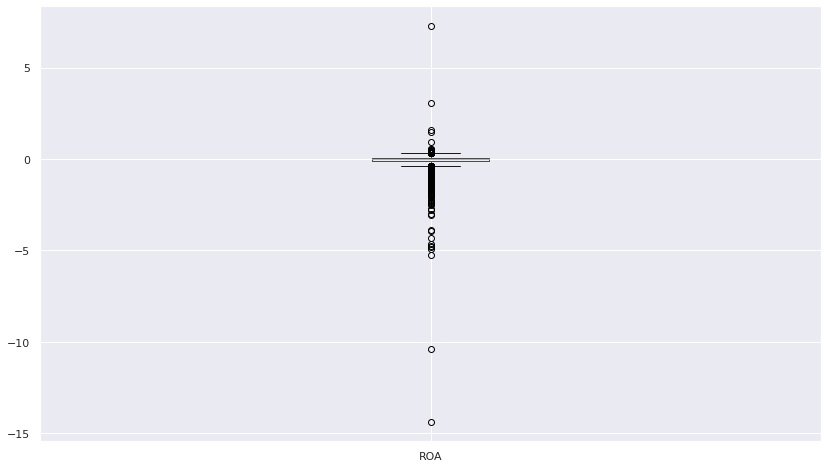

In [186]:
df_profitability[['ROA']].boxplot()

In [187]:
df_profitability[['firm','ROA']].sort_values(by='ROA', ascending = False).head(10).plot(kind='barh', x='firm')

KeyError: ignored

**TOP 10 FIRMS WITH THE HIGHEST ROA, THE INFORMATION GOES FROM THE FEWEST TO THE GREATEST ROA**

In [188]:
df_profitability[['ROA']].describe()

,ROA
count,3362.000000
mean,-0.106452
std,0.523654
min,-14.351967
25%,-0.118418
50%,0.019610
75%,0.059463
max,7.259574


***GENERAL ANALYSIS:***

*THE MOST IMPORTANT RATIO OF PROFITABILITY FOR THE FIRMS IS THE ROA, THE RETURN OF ASSETS INDICATES HOW EFFICENTLY A COMPANY USE THE ASSETS TO GENERATE PROFITS, ACCORDING TO THE BOXPLOT, A LITTLE FEW FIRMS GOT A POSITIVE ROA, ALL THE TOP 10 HAVE AN ACCEPTABLE ROA, FOR NOW, THIS IS A GOOD INDICATOR OF PROFITABILITY BETWEEN THE FIRMS. IT IS INTERESTING THAT THE AVERAGE ROA IS NEGATIVE, THIS INDICATES HOW HARD A FIRM CAN BE PROFITABLE*


2  
  
    Rentabilidad de una empresa = Profit margin
    
    Measure of profitability
        
    profit margin = Ebit/revenues

In [189]:
df_profitability = df_profitability.assign(profitmargin = (df_profitability['ebit']/df_profitability['revenue']))
df_pmargin = df_profitability[['firm','ebit','revenue','profitmargin']].sort_values(by='profitmargin', ascending = False)
ind_pm = df_pmargin['profitmargin'].index
df_pmTop = df_pmargin.drop(ind_pm[0:5]).head(10)
df_pmTop

KeyError: ignored

**EBIT, REVENUES AND PROFIT MARGIN OF THE TOP 10 FIRMS WITH THE HIGHEST ROA VALUE, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST ROA VALUE**

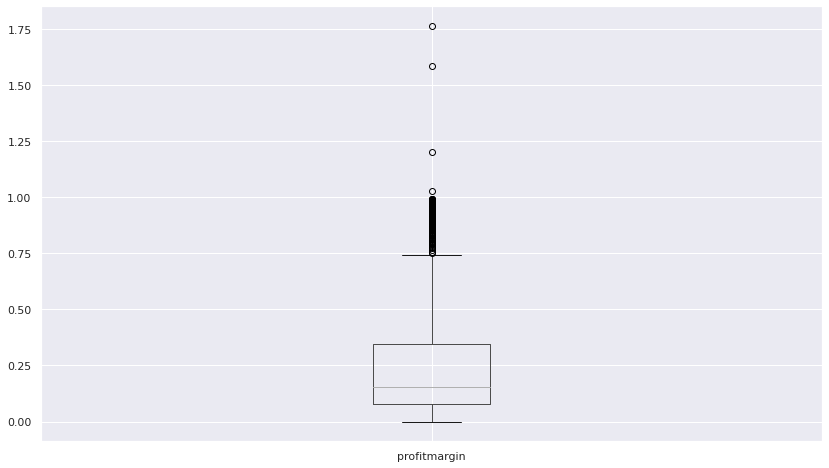

In [190]:
df_pmbox = df_pmargin.query("profitmargin >= 0 and profitmargin <= 2")
df_pmbox[['profitmargin']].boxplot()

In [191]:
df_pmbox[['profitmargin']].describe()

,profitmargin
count,2237.000000
mean,0.282469
std,0.303550
min,0.000060
25%,0.076125
50%,0.153570
75%,0.343672
max,1.761950


***GENERAL ANALYSIS:***

*PROFIT MARGIN IS A RATIO OF PROFITABILITY, PROFIT MARGIN INDICATES THE PERCENTAGE TO WHICH A FIRMS MAKES MONEY WITH THE REVENUES, ACCORDING TO THE BOXPLOT, A LITTLE FEW HAVE A GOOD PROFIT MARGIN, MOST OF THEY ARE NEAR TO THE ZERO, BUT ALL THE TOP 10 HAVE AN ACCEPTABLE PROFIT MARGIN AND HIGHER THAN THE AVERAGE PROFIT MARGIN, A DISAVANTAGE IS SOME MISSING DATA FROM SOME FIRMS, THAT GENERATES OUTLIERS WITH THE PROFIT MARGIN, EVEN SO THIS IS A GOOD PROFITABILITY INDICATOR.*

3  
  
    Rentabilidad de una empresa = book-to-market ratio
    
    Book value/market value

In [192]:
df_profitability = df_profitability.assign(bookvalue = (df_rollybv[['bookvalue']]))
df_profitability = df_profitability.assign(marketvalue = (df_rollymv[['marketvalue']]))
df_profitability = df_profitability.assign(booktomarket = (df_profitability['bookvalue']/df_profitability['marketvalue']))

In [193]:
df_btmUpdated = df_profitability

In [195]:
df_btmUpdated = df_btmUpdated.query("booktomarket > 0 and booktomarket < 2")
df_btmUpdated[['booktomarket']].sort_values(by='booktomarket', ascending = True).head(10)

,,booktomarket
firm,q,
MTD,2022Q2,0.000281
PBT,2022Q2,0.000423
RHP,2022Q2,0.001486
LYV,2022Q2,0.001858
WK,2022Q2,0.002285
FTDR,2022Q2,0.003029
SHLS,2022Q2,0.003063
CHWY,2022Q2,0.004013
PANW,2022Q2,0.006860


**BOOK VALUE, MARKE TVALUE AND BOOT-TO-MARKET OF THE TOP 10 FIRMS WITH THE BEST B-TO-M VALUE, THE INFORMATION GOES FROM THE FEWEST AND NEARLY TO 0 TO THE GREATEST B-TO-M VALUE**

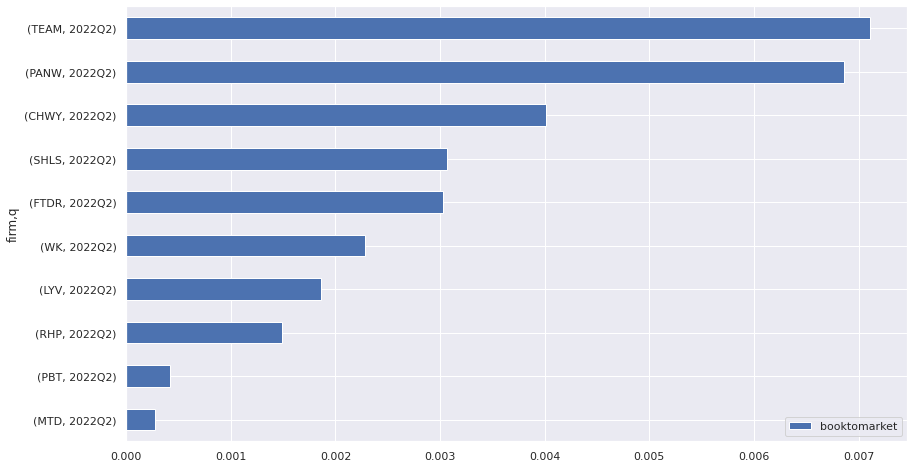

In [198]:
df_btmUpdated[['booktomarket']].sort_values(by='booktomarket', ascending = True).head(10).plot(kind = 'barh')

In [199]:
df_btmUpdated[['booktomarket']].describe()

,booktomarket
count,3020.000000
mean,0.619826
std,0.428796
min,0.000281
25%,0.284019
50%,0.532359
75%,0.875095
max,1.996012


***GENERAL ANALYSIS:***

*THE BOOK TO MARKET RATIO INDICATES IF A FIRM HAVE A EXPENSIVE STOCK OR A CHEAP STOCK ACCORDING TO THE VALUE OF THE RATIO, THE TOP 10 HAVE AN INDICATORS OF A BAD INVESTMENT OR A STOCK UNDERVALUED, IF THE BOOK TO MARKET RATIO IS HIGHER IT IS A INDICATOR FOR A OVERVALUED STOCK, EVEN SO THIS IS A GOOD OF PROFITABILITY INDICATOR FOR INVESTORS, TO SEE FIRMS WITH A GOOD PERFORMANCE OR GOOD POTENTIAL THE HIGHEST B-TO-M RATIO WILL INDICATE IT.*

# Calculate and explain earnings per share deflated by price.

In [200]:
df_eps = df_profitability.assign(eps = (df_profitability['netincome']/df_profitability['sharesoutstanding']))

In [202]:
df_epsTop = df_eps[['netincome','sharesoutstanding','eps']].sort_values(by='eps', ascending = False)
ind_eps = df_epsTop['eps'].index
df_epsTop = df_epsTop.drop(ind_eps[0])
df_epsTop.head(10)

,,netincome,sharesoutstanding,eps
firm,q,,,
SEB,2022Q2,5.450000e+05,1160.779,469.512284
NVR,2022Q2,1.374138e+06,3289.666,417.713531
FCNCA,2022Q2,1.952900e+06,16001.599,122.044053
GOOGL,2022Q2,6.906500e+07,658499.877,104.882328
WRLD,2022Q2,5.677851e+05,6278.324,90.435780
AZO,2022Q2,1.619561e+06,19487.599,83.107262
BKNG,2022Q2,3.203000e+06,40623.256,78.846462
ARCH,2022Q2,1.012538e+06,15477.360,65.420589
CACC,2022Q2,8.299000e+05,13139.579,63.160319


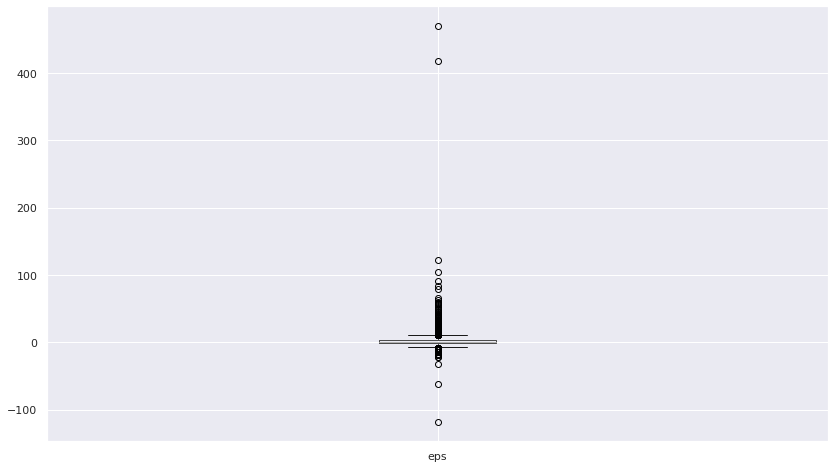

In [203]:
df_epsTop[['eps']].boxplot()

***GENERAL ANALYSIS:***

*THE EARNING PER SHARE REPRESENTS STADISTICALLY THE VALUE OF THE EARNINGS OF THE FIRMS ACCORDING EACH SHARE IN THE FIRMS, IT IS A INDICATOR FOR PROFITABILITY OF FIRMS, THIS INDICATOR CAN SHOW THE PERFORMANCE WITH THE TOTAL OF EARNINGS(NET INCOME).*

# **PARTE 2: MODELO ESTADÍSTICO**

# Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns

In [204]:
from scipy.stats.mstats import winsorize

In [205]:
df_predict = df.merge(df_firms, on='firm')

In [206]:
df_predict = df_predict.query("Industry == 'Manufacturing'")

Do histograms for each factor/variables and interpret them

***ROA***

In [207]:
df_predict = df_predict.assign(ebit = (df_predict['revenue']-df_predict['cogs']-df_predict['sgae']-df_predict['otheropexp']))
df_predict.replace([np.inf, -np.inf], np.nan, inplace=True)
df_predict = df_predict.assign(netincome = (df_predict['ebit']-df_predict['incometax']-df_predict['finexp']))
df_predict = df_predict.assign(ROA = (df_predict['netincome']/df_predict['totalassets']))
df_predict_roa = df_predict[['Industry','ROA']]

In [208]:
df_predict_roa

,Industry,ROA
0,Manufacturing,NaN
1,Manufacturing,0.016938
2,Manufacturing,0.016226
3,Manufacturing,0.035015
4,Manufacturing,0.017376
...,...,...
323811,Manufacturing,-0.100132
323812,Manufacturing,-0.113401
323813,Manufacturing,-0.108807
323814,Manufacturing,-0.118416


In [209]:
df_predict_roa['ROA'] = winsorize(df_predict_roa['ROA'], limits=[0.0001, 0.06])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


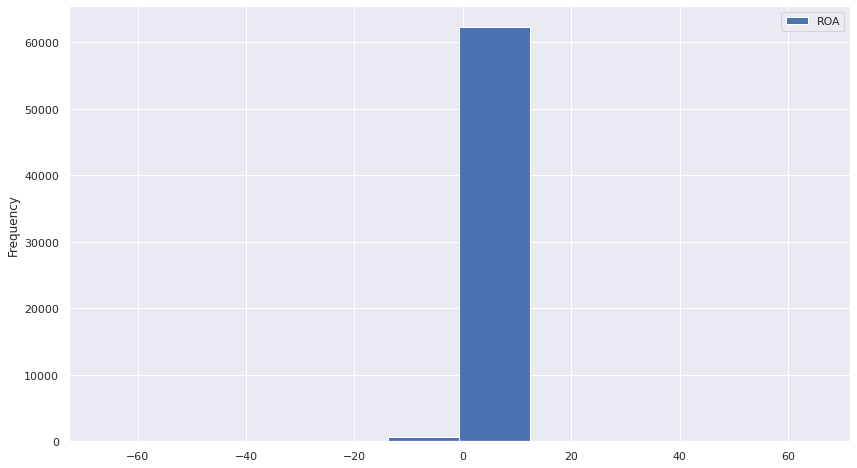

In [210]:
df_predict_roa.plot(kind = 'hist')

In [211]:
df_predict_roa.describe()

,ROA
count,62985.000000
mean,-0.061342
std,1.588671
min,-66.160002
25%,-0.048594
50%,0.007020
75%,0.020274
max,64.832168


***PROFIT MARGIN***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


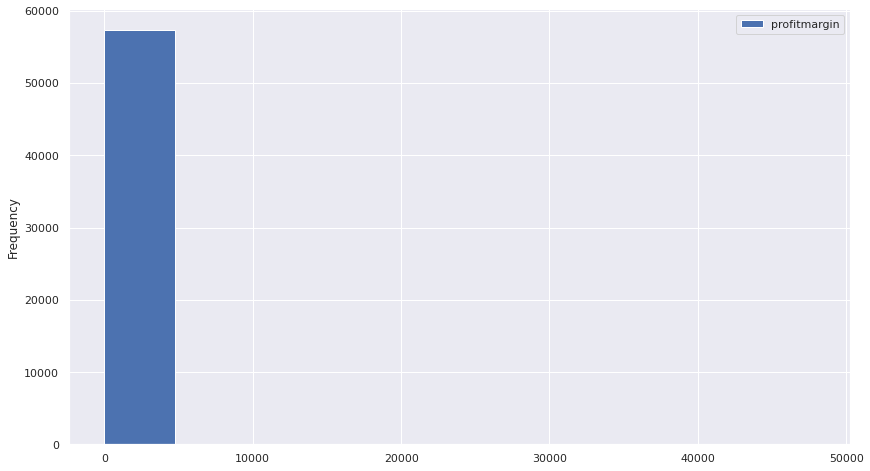

In [212]:
df_predict = df_predict.assign(profitmargin = (df_predict['ebit']/df_predict['revenue']))
df_predict.replace([np.inf, -np.inf], np.nan, inplace=True)
df_predict_pm = df_predict[['Industry','profitmargin']]
df_predict_pm['profitmargin'] = winsorize(df_predict_pm['profitmargin'], limits=[0.02, 0.02])
df_predict_pm.plot.hist()

In [213]:
df_predict_pm.describe()

,profitmargin
count,57319.000000
mean,0.449009
std,210.422395
min,-12.383017
25%,-0.080817
50%,0.067211
75%,0.136139
max,47854.000000


***BOOK TO MARKET RATIO***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


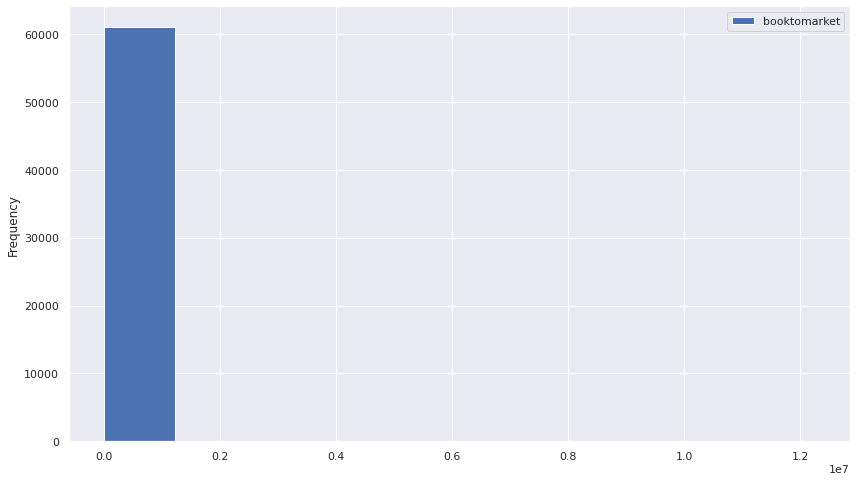

In [214]:
df_predict = df_predict.assign(marketvalue = (df_predict['originalprice']*df_predict['sharesoutstanding']))
df_predict = df_predict.assign(bookvalue = (df_predict['totalassets']-df_predict['totalliabilities']))
df_predict = df_predict.assign(booktomarket = (df_predict['bookvalue']/df_predict['marketvalue']))
df_predict.replace([np.inf, -np.inf], np.nan, inplace=True)

df_predict_btm = df_predict[['Industry','booktomarket']]
df_predict_btm['booktomarket'] = winsorize(df_predict_btm['booktomarket'], limits=[0.02, 0.02])
df_predict_btm.plot(kind = 'hist')

In [215]:
df_predict_btm.describe()

,booktomarket
count,6.102400e+04
mean,2.016669e+02
std,4.958400e+04
min,7.123106e-03
25%,1.892829e-01
50%,3.458245e-01
75%,5.957726e-01
max,1.224872e+07


In [216]:
df_predict = df_predict.assign(eps = (df_predict['netincome']/df_predict['sharesoutstanding']))
df_predict.replace([np.inf, -np.inf], np.nan, inplace=True)

Industry
Manufacturing    AxesSubplot(0.125,0.125;0.775x0.755)
Name: eps, dtype: object

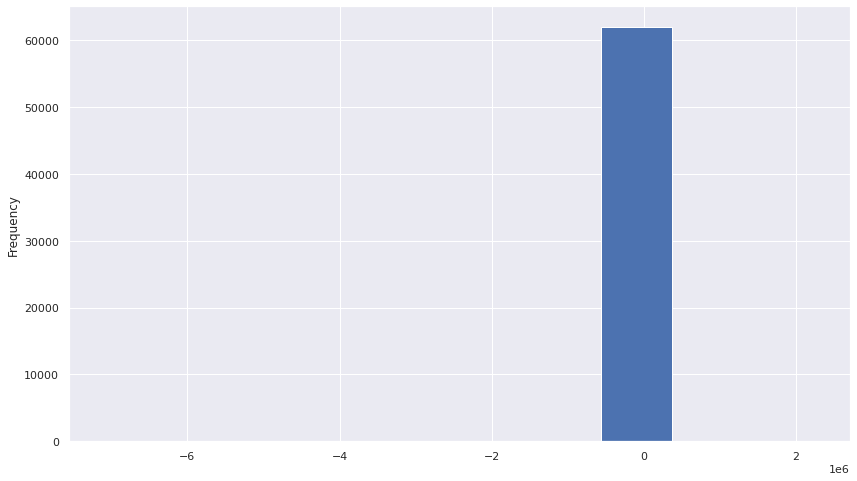

In [217]:
df_predict_eps = df_predict.groupby('Industry')['eps']
df_predict_eps.plot(kind = 'hist')

# Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model



*Multiple regression model*

**dataset: historial panel data of your industry firms**

**dependent variable: annual stock return (cc) 1 quarter in the future**

**independent variables ESPS, size + the 3 factors**

**control variables: ESPS, size**

In [218]:
df_predict = df_predict.sort_values(by=['q','marketvalue'], ascending = True)

In [219]:
df_predict['size'] = df_predict.groupby(['q'])['marketvalue'].transform(lambda x: pd.qcut(x,3,labels = ["small", "medium", "big"]))

In [220]:
df_predict[['size']].value_counts(sort = True)

size  
small     20472
big       20443
medium    20407
dtype: int64

# Obtaining dependent variable

In [221]:
df_predict['R'] = np.log(df_predict['adjprice']) - np.log(df_predict.groupby(['firm'])['adjprice'].shift(4))
df_predict['Returns Next Quarter'] = df_predict.groupby(['firm'])['R'].shift(0)

In [222]:
x = ["size","ROA",'profitmargin','booktomarket','eps']

In [223]:
modelAll = sm.OLS((df_predict['Returns Next Quarter'].shift(-1)), sm.add_constant(pd.get_dummies(df_predict[x], drop_first = True)), missing = "drop").fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [224]:
print(modelAll.summary())

                             OLS Regression Results                             
Dep. Variable:     Returns Next Quarter   R-squared:                       0.069
Model:                              OLS   Adj. R-squared:                  0.069
Method:                   Least Squares   F-statistic:                     638.1
Date:                  Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                          04:04:10   Log-Likelihood:                -42382.
No. Observations:                 51470   AIC:                         8.478e+04
Df Residuals:                     51463   BIC:                         8.484e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2166     

In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [231]:
variables = modelAll.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[3.4575701452166374,
 1.0058689316274083,
 1.0004769045298798,
 512121101.86447257,
 512121130.982074,
 1.427836282649112,
 1.4801910425066267]

# Interpret your model

Interpret the results of each coefficient (beta and their statistical significance)

***THE INDEPENDENT VARIABLES THAT MOST INFLUENCE THE MODEL FOR PREDICTING ANNUAL STOCK RETURNS IN A FUTURE QUARTER ARE THOSE THAT DETERMINE THE SIZE, BECAUSE THEY HAVE THE HIGHEST T VALUE, MEANWHILE, ALMOST ALL THE INDEPENDENT VARIABLES ARE SIGNIFICANT BECAUSE THEY HAVE THE P VALUE IS VERY CLOSE TO 0, VERIFYING THAT THE NULL HYPOTHESIS IS REJECTED.***

***ON THE OTHER HAND, WE FIND THAT, COMPARING THE COEFFICIENTS OF SIZE, THEY HAVE A POSITIVE RELATIONSHIP IN TERMS OF ANNUAL RETURNS, WHICH MEANS THAT WHEN THE COMPANY IS BIGGER, THE ANNUAL RETURNS WILL INCREASE, WHILE WHEN THE SIZE OF THE COMPANY IS LOWER. THE COMPANY, RETURNS WILL DECREASE.***

***PROFIT MARGIN IS TE INDEPENDENT VARIABLE WITH THE LESS SIGNIFICANCE BECAUSE IS HIGHER THAN 0.05 P VALUE AND THE T VALUE IS NEGATIVE, WHENCE TO DEVELOP A BETTER MODEL, IT WILL DROP THE VARIABLE, WITH THIS, THE MODEL WILL INCREASE IN ACCURACY FORM R-SQUARE***

***FINALLY, ANALYZING THE R-SQUARE WE HAVE THAT THE MODEL WILL HAVE AN ACCURACY OF 6.9% TO HAVE THIS ANALYSIS OF THE RETURNS AS MENTIONED ABOVE.***

***FOR THE COEFFICENT CONSTANT, WE HAVE A NEGATIVE VALUE, THAT MEANS IF WE HAVE A RETURN OF ZERO IN THE FORMULA, THE CONSTANT WILL DO A NEGATIVE RETURNS, THAT MEANS THE FIRM WILL LOSS RETURNS.***

***LATER, WE FOUND THAT ROA, BOOKTOMARKET, EPS, SIZE MEDIUM AND SIZE BIG ARE SIGNIFICANTLY POSITIVE WITH THE RELATION TO THE RETURNS, THIS IS BECAUSE THE P VALUE IS NEAR TO ZERO VALUE.***

***THE COEFFICENT OF ROA SAYS THAT, FOR EACH 1% OF CHANGE IN THE ROA, THE RETURNS OF THE NEXT QUARTER WILL BE 0.82% HIGHER OR LOWER, ACCORDING TO THE TYPE OF CHANGE (POSITIVE OR NEGATIVE)***

***THE COEFFICENT OF BOOKTOMARKET SAYS THAT, FOR EACH 1% OF CHANGE IN THE BOOKTOMARKET RATIO, THE RETURNS OF THE NEXT QUARTER WILL BE 0.68% HIGHER OR LOWER, ACCORDING TO THE TYPE OF CHANGE (POSITIVE OR NEGATIVE)***

***THE COEFFICENT OF EPS SAYS THAT, FOR EACH 1% OF CHANGE IN THE EPS, THE RETURNS OF THE NEXT QUARTER WILL BE 1.17% HIGHER OR LOWER, ACCORDING TO THE TYPE OF CHANGE (POSITIVE OR NEGATIVE)***

***THE COEFFICENT OF SIZE_MEDIUM SAYS THAT, FOR EACH 1% OF CHANGE IN THE SIZE_MEDIUM, THE RETURNS OF THE NEXT QUARTER WILL BE 29.3% HIGHER OR LOWER, ACCORDING TO THE TYPE OF CHANGE (POSITIVE OR NEGATIVE), THIS IS IF THE FIRM IS OF MEDIUM SIZE***

***THE COEFFICENT OF BIG_SIZE SAYS THAT, FOR EACH 1% OF CHANGE IN THE SIZE_MEDIUM, THE RETURNS OF THE NEXT QUARTER WILL BE 33.9% HIGHER OR LOWER, ACCORDING TO THE TYPE OF CHANGE (POSITIVE OR NEGATIVE), THIS IS IF THE FIRM IS OF BIG SIZE***


***ANALIZING THE VIF VALUES, WE HAVE STADISTICALLY PROBLEMS OF MULTICOLLINEARITY BECAUSE THE VALUES OF BOOKTOMARKET AND EPS ARE HIGHER THAN 10.***

# Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model. You have to run and interpret your final model.

In [225]:
xFinal = ["size","ROA",'booktomarket','eps']

In [226]:
modelFinal = sm.OLS((df_predict['Returns Next Quarter'].shift(-1)), sm.add_constant(pd.get_dummies(df_predict[xFinal], drop_first = True)), missing = "drop").fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [227]:
print(modelFinal.summary())

                             OLS Regression Results                             
Dep. Variable:     Returns Next Quarter   R-squared:                       0.077
Model:                              OLS   Adj. R-squared:                  0.077
Method:                   Least Squares   F-statistic:                     943.0
Date:                  Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                          04:04:15   Log-Likelihood:                -48553.
No. Observations:                 56154   AIC:                         9.712e+04
Df Residuals:                     56148   BIC:                         9.717e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2436     

In [233]:
variables = modelFinal.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[3.104493193228999,
 1.0038330020991482,
 483482918.15078783,
 483482944.1028888,
 1.353218586848176,
 1.4140696821588872]

***WITH THIS NEW MODEL WE HAVE AN INCREASE IN THE R-SQUARE, THIS IS IMPORTANT, BECAUSE THE MODEL WILL HAVE A ACCURACY OF 7.7% TO PREDICT THE ANNUAL STOCK RETURNS.***

***IN CONCLUSION, THE ANNUAL STOCK RETURNS ARE HIGHLY DEPENDENT FROM THE SIZE OF THE FIRM IN MOST OF THE CASES (ACCORDING TO THE >99%).***

***FOR THE COEFFICENTS WE HAVE A NEGATIVE VALUE, THAT MEANS IF WE HAVE A RETURN OF ZERO IN THE FORMULA, THE CONSTANT WILL DO A NEGATIVE RETURNS, THAT MEANS THE FIRM WILL LOSS RETURNS.***

***LATER, WE FOUND THAT ROA, BOOKTOMARKET, EPS, SIZE MEDIUM AND SIZE BIG ARE SIGNIFICANTLY POSITIVE WITH THE RELATION TO THE RETURNS, THIS IS BECAUSE THE P VALUE IS NEAR TO ZERO VALUE.***

***THE COEFFICENT OF ROA SAYS THAT, FOR EACH 1% OF CHANGE IN THE ROA, THE RETURNS OF THE NEXT QUARTER WILL BE 0.38% HIGHER OR LOWER, ACCORDING TO THE TYPE OF CHANGE (POSITIVE OR NEGATIVE)***

***THE COEFFICENT OF BOOKTOMARKET SAYS THAT, FOR EACH 1% OF CHANGE IN THE BOOKTOMARKET RATIO, THE RETURNS OF THE NEXT QUARTER WILL BE 0.67% HIGHER OR LOWER, ACCORDING TO THE TYPE OF CHANGE (POSITIVE OR NEGATIVE)***

***THE COEFFICENT OF EPS SAYS THAT, FOR EACH 1% OF CHANGE IN THE EPS, THE RETURNS OF THE NEXT QUARTER WILL BE 1.16% HIGHER OR LOWER, ACCORDING TO THE TYPE OF CHANGE (POSITIVE OR NEGATIVE)***

***THE COEFFICENT OF SIZE_MEDIUM SAYS THAT, FOR EACH 1% OF CHANGE IN THE SIZE_MEDIUM, THE RETURNS OF THE NEXT QUARTER WILL BE 31.86% HIGHER OR LOWER, ACCORDING TO THE TYPE OF CHANGE (POSITIVE OR NEGATIVE), THIS IS IF THE FIRM IS OF MEDIUM SIZE***

***THE COEFFICENT OF BIG_SIZE SAYS THAT, FOR EACH 1% OF CHANGE IN THE SIZE_MEDIUM, THE RETURNS OF THE NEXT QUARTER WILL BE 36.79% HIGHER OR LOWER, ACCORDING TO THE TYPE OF CHANGE (POSITIVE OR NEGATIVE), THIS IS IF THE FIRM IS OF BIG SIZE***